<a href="https://colab.research.google.com/github/AmritaNeogi/Face_Mask_Detection/blob/main/Face_Mask_Detection_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
!pip install kaggle

In [26]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp /content/drive/MyDrive/Colab\ Notebooks/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing Face Mask Dataset

In [27]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset


face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [28]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [29]:
!ls

data  drive  face-mask-dataset.zip  sample_data


**Importing the Dependencies**

In [30]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [43]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_2382.jpg', 'with_mask_3616.jpg', 'with_mask_2186.jpg', 'with_mask_3682.jpg', 'with_mask_1755.jpg']
['with_mask_1980.jpg', 'with_mask_2711.jpg', 'with_mask_2769.jpg', 'with_mask_1226.jpg', 'with_mask_367.jpg']


In [44]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_2523.jpg', 'without_mask_640.jpg', 'without_mask_613.jpg', 'without_mask_2446.jpg', 'without_mask_2447.jpg']
['without_mask_1680.jpg', 'without_mask_1207.jpg', 'without_mask_1152.jpg', 'without_mask_2552.jpg', 'without_mask_3608.jpg']


In [33]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3726
Number of without mask images: 3828


**Creating Labels for the two class of Images**

with mask  -->  1

without mask  -->  0

In [34]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [35]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [36]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [37]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the Images**

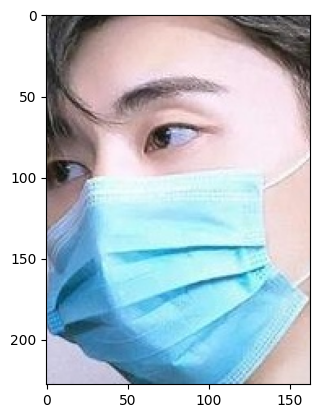

In [38]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

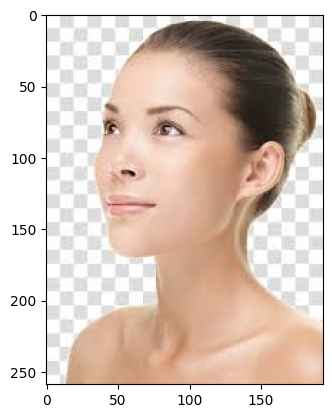

In [39]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

1. Resize the Images

2. Convert the images to numpy arrays

In [42]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'
with_mask_files = os.listdir(with_mask_path)

data = []

for img_file in with_mask_files:
  if not os.path.isdir(with_mask_path + img_file):
    image = Image.open(with_mask_path + img_file) # reading the image from the folder
    image = image.resize((128,128))
    image = image.convert('RGB') # converting all images to colour, since some are b & w and it is difficult to train Neural Network that way
    image = np.array(image)
    data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:
  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [45]:
type(data)

list

In [46]:
len(data)

7553

In [47]:
data[0]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       ...,

       [[185, 142, 108],
        [187, 144, 110],
        [190, 147, 113],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[185, 142, 108],
        [187, 144, 110],
        [190, 147, 113],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[185, 142, 108],
        [187, 144, 110],
        [190, 147, 113],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [48]:
data[0].shape

(128, 128, 3)

In [49]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [50]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [51]:
print(Y)

[1 1 1 ... 0 0 0]


**Train Test Split**

In [52]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [53]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [54]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [22]:
X_train[0]

array([[[ 31,  69, 118],
        [ 30,  67, 116],
        [ 31,  68, 116],
        ...,
        [ 95, 120, 125],
        [ 96, 119, 125],
        [ 97, 120, 126]],

       [[ 33,  69, 118],
        [ 32,  68, 117],
        [ 31,  66, 114],
        ...,
        [ 97, 122, 127],
        [ 97, 122, 127],
        [ 98, 123, 128]],

       [[ 29,  66, 111],
        [ 32,  67, 113],
        [ 34,  68, 114],
        ...,
        [ 97, 124, 128],
        [ 99, 124, 129],
        [100, 125, 130]],

       ...,

       [[ 37,  59,  83],
        [ 40,  64,  86],
        [ 40,  65,  89],
        ...,
        [239, 239, 253],
        [242, 241, 255],
        [243, 242, 255]],

       [[ 36,  52,  73],
        [ 37,  55,  77],
        [ 38,  58,  82],
        ...,
        [238, 239, 252],
        [239, 239, 253],
        [239, 239, 252]],

       [[ 36,  48,  67],
        [ 34,  48,  68],
        [ 36,  52,  74],
        ...,
        [233, 239, 251],
        [237, 242, 254],
        [235, 239, 251]]

In [23]:
X_train_scaled[0]

array([[[0.12156863, 0.27058824, 0.4627451 ],
        [0.11764706, 0.2627451 , 0.45490196],
        [0.12156863, 0.26666667, 0.45490196],
        ...,
        [0.37254902, 0.47058824, 0.49019608],
        [0.37647059, 0.46666667, 0.49019608],
        [0.38039216, 0.47058824, 0.49411765]],

       [[0.12941176, 0.27058824, 0.4627451 ],
        [0.1254902 , 0.26666667, 0.45882353],
        [0.12156863, 0.25882353, 0.44705882],
        ...,
        [0.38039216, 0.47843137, 0.49803922],
        [0.38039216, 0.47843137, 0.49803922],
        [0.38431373, 0.48235294, 0.50196078]],

       [[0.11372549, 0.25882353, 0.43529412],
        [0.1254902 , 0.2627451 , 0.44313725],
        [0.13333333, 0.26666667, 0.44705882],
        ...,
        [0.38039216, 0.48627451, 0.50196078],
        [0.38823529, 0.48627451, 0.50588235],
        [0.39215686, 0.49019608, 0.50980392]],

       ...,

       [[0.14509804, 0.23137255, 0.3254902 ],
        [0.15686275, 0.25098039, 0.3372549 ],
        [0.15686275, 0

In [32]:
X_test_scaled[0]

array([[[0.06666667, 0.04705882, 0.03529412],
        [0.06666667, 0.04705882, 0.03529412],
        [0.06666667, 0.04705882, 0.03529412],
        ...,
        [0.15294118, 0.12156863, 0.16470588],
        [0.11764706, 0.08627451, 0.12941176],
        [0.10588235, 0.0745098 , 0.11764706]],

       [[0.09411765, 0.07058824, 0.05882353],
        [0.09411765, 0.07058824, 0.05882353],
        [0.09019608, 0.06666667, 0.05490196],
        ...,
        [0.19215686, 0.16078431, 0.20784314],
        [0.15294118, 0.12156863, 0.16470588],
        [0.1372549 , 0.10588235, 0.14901961]],

       [[0.13333333, 0.10196078, 0.09411765],
        [0.13333333, 0.10196078, 0.09411765],
        [0.12941176, 0.09803922, 0.08627451],
        ...,
        [0.2627451 , 0.23137255, 0.2745098 ],
        [0.21568627, 0.18823529, 0.23137255],
        [0.2       , 0.16862745, 0.21176471]],

       ...,

       [[0.05882353, 0.05882353, 0.06666667],
        [0.05882353, 0.05882353, 0.06666667],
        [0.05882353, 0

**Building a Convolutional Neural Networks (CNN)**

In [55]:
import tensorflow as tf
from tensorflow import keras

In [56]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3),
                                  activation='relu',
                                  input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3),
                                  activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [57]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [58]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 16s 23ms/step - loss: 0.4945 - acc: 0.7808 - val_loss: 0.3166 - val_acc: 0.8628
Epoch 2/5
170/170 [==============================] - 3s 17ms/step - loss: 0.2936 - acc: 0.8838 - val_loss: 0.2133 - val_acc: 0.9091
Epoch 3/5
170/170 [==============================] - 3s 20ms/step - loss: 0.2222 - acc: 0.9128 - val_loss: 0.1838 - val_acc: 0.9174
Epoch 4/5
170/170 [==============================] - 3s 18ms/step - loss: 0.1922 - acc: 0.9308 - val_loss: 0.1867 - val_acc: 0.9207
Epoch 5/5
170/170 [==============================] - 3s 17ms/step - loss: 0.1413 - acc: 0.9476 - val_loss: 0.1840 - val_acc: 0.9140


**Model Evaluation**

In [59]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 0s 10ms/step - loss: 0.1650 - acc: 0.9351
Test Accuracy = 0.9351422786712646


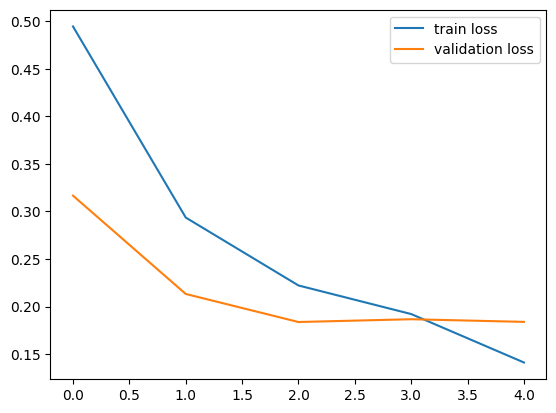

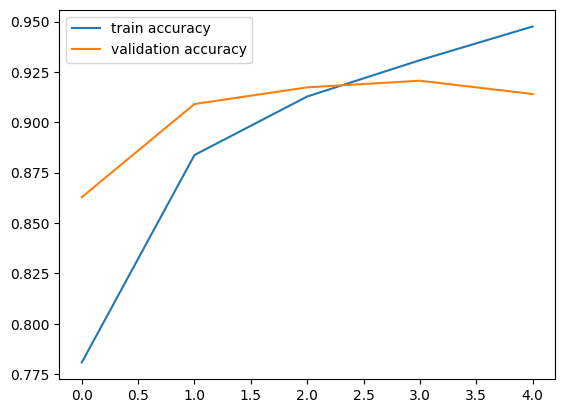

In [60]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

In [61]:
# converting the prediction probability to class labels
Y_pred = model.predict(X_test_scaled)
print(Y_pred)

48/48 [==============================] - 0s 6ms/step
[[0.00231108 0.99858487]
 [0.9682912  0.0690427 ]
 [0.01447764 0.98990345]
 ...
 [0.13057245 0.97285366]
 [0.9871092  0.03203755]
 [0.92791206 0.14106338]]


In [62]:
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 

Path of the image to be predicted: /content/data/with_mask/with_mask_1023.jpg


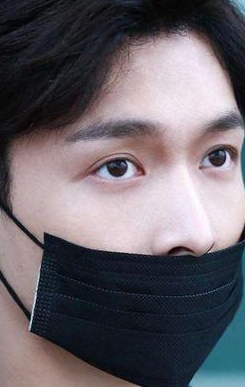

1/1 [==============================] - 0s 299ms/step
[[0.3965102  0.71582055]]
1
The person in the image is wearing a mask


In [63]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3]) # since we are doing prediction for only one image, so the '1'

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/data/without_mask/without_mask_1069.jpg


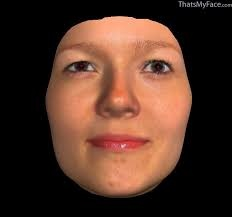

1/1 [==============================] - 0s 20ms/step
[[0.66037786 0.61537105]]
0
The person in the image is not wearing a mask


In [64]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')